In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, roc_curve, precision_recall_curve, confusion_matrix, f1_score, average_precision_score, cohen_kappa_score
from inspect import signature
from sklearn.externals import joblib
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz
from sklearn import model_selection
from sklearn.externals.six import StringIO 
from sklearn import metrics
from sklearn.metrics import classification_report



C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## 1. Prepare Data

In [2]:
X_train_resampled = pd.read_csv("../3. Data Preparation/X_train_resampled.csv", index_col=0)
X_train_resampled.shape

(1848, 30)

In [3]:
target_names=['Not Fraud 0', 'Fraud 1']

## 2. Load Model AdaBoost

In [4]:
clf = joblib.load('AdaBoost Classifier.pkl') 

## 3. Create Dataframe to save the OOB values 

In [5]:
df_features = pd.DataFrame(columns=['Name', 'OOB'])
df_features.set_index('Name', inplace=True)
df_features.head()


,OOB
Name,


In [6]:
for feature in zip(X_train_resampled.columns.values, clf.feature_importances_):
    print(feature)
    df_features.at[feature[0]] = feature[1]

('V1', 0.01951279641579015)
('V2', 0.0)
('V3', 0.01470854931646699)
('V4', 0.12842070340811282)
('V5', 0.014608820967149074)
('V6', 0.029884353346515853)
('V7', 0.04413086170988618)
('V8', 0.07032098987458216)
('V9', 0.006612395246397254)
('V10', 0.008471289345600808)
('V11', 0.0032132029538438846)
('V12', 0.008289764498740967)
('V13', 0.003791329772339291)
('V14', 0.22458836746281421)
('V15', 0.010891654270776246)
('V16', 0.01079624287131312)
('V17', 0.06311563767650889)
('V18', 0.007268708729975549)
('V19', 0.05224993832703384)
('V20', 0.05102632736887871)
('V21', 0.026533322877442117)
('V22', 0.06727757989199258)
('V23', 0.0)
('V24', 0.0)
('V25', 0.0)
('V26', 0.00474340557427892)
('V27', 0.0008965949414077376)
('V28', 0.017788800721056326)
('Scaled_Amount', 0.047105570103756884)
('Scaled_Time', 0.06375279232733949)


In [7]:
df_features.sort_values("OOB", axis=0, ascending=False, inplace=True)
df_features.head()

,OOB
Name,
V14,0.224588
V4,0.128421
V8,0.070321
V22,0.0672776
Scaled_Time,0.0637528


## 4. Plot OOB Score

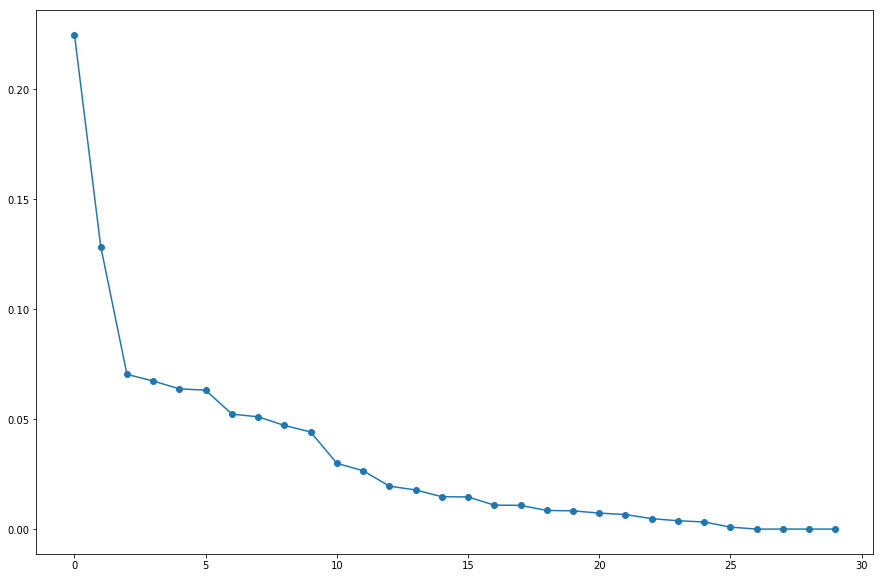

In [8]:
plt.figure(figsize = (15,10))
plt.plot(df_features['OOB'].values, "o-")
plt.show()

## 5. Choose features and save in a csv file

In [8]:
df_features.to_csv("AdaBoost (AllFeatures - OOB).csv")

In [9]:
df_features[:10].to_csv("AdaBoost (AllFeatures - OOB - 10).csv")

